# **IMPORT DATASET**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving A_test.jpg to A_test.jpg
Saving B_test.jpg to B_test.jpg
Saving C_test.jpg to C_test.jpg
Saving D_test.jpg to D_test.jpg
Saving E_test.jpg to E_test.jpg
Saving F_test.jpg to F_test.jpg
Saving G_test.jpg to G_test.jpg
Saving H_test.jpg to H_test.jpg
Saving I_test.jpg to I_test.jpg
Saving J_test.jpg to J_test.jpg
Saving K_test.jpg to K_test.jpg
Saving L_test.jpg to L_test.jpg
Saving M_test.jpg to M_test.jpg
Saving N_test.jpg to N_test.jpg
Saving nothing_test.jpg to nothing_test.jpg
Saving O_test.jpg to O_test.jpg
Saving P_test.jpg to P_test.jpg
Saving Q_test.jpg to Q_test.jpg
Saving R_test.jpg to R_test.jpg
Saving S_test.jpg to S_test.jpg
Saving space_test.jpg to space_test.jpg
Saving T_test.jpg to T_test.jpg
Saving U_test.jpg to U_test.jpg
Saving V_test.jpg to V_test.jpg
Saving W_test.jpg to W_test.jpg
Saving X_test.jpg to X_test.jpg
Saving Y_test.jpg to Y_test.jpg
Saving Z_test.jpg to Z_test.jpg


# **IMPORT LIBRARIES**

In [7]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array  # ✅ <-- add this
from tensorflow.keras.utils import to_categorical


# **Load Dataset**

In [8]:
data_dir = "./"  # your image folder
images = []
labels = []

# Collect all images that end with "_test.jpg"
for file in os.listdir(data_dir):
    if file.endswith("_test.jpg"):
        img_path = os.path.join(data_dir, file)
        img = load_img(img_path, target_size=(64, 64))
        img_array = img_to_array(img) / 255.0
        images.append(img_array)

        # Label from filename (e.g., A_test.jpg -> A)
        label = file.split("_")[0]
        labels.append(label)

# Encode labels
unique_labels = sorted(list(set(labels)))
label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
y = np.array([label_to_idx[label] for label in labels])

X = np.array(images)
y = to_categorical(y, num_classes=len(unique_labels))

print("Total Samples:", X.shape[0])
print("Classes:", unique_labels)


Total Samples: 28
Classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']


# **Apply Data Augmentation**

In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow(X, y, batch_size=8, subset='training')
val_gen = datagen.flow(X, y, batch_size=8, subset='validation')


# **Build the CNN Model**

In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(unique_labels), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,764 (6.21 MB)

 Trainable params: 1,628,764 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

# **Train the Model**

In [11]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25
)


Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 232ms/step - accuracy: 0.0686 - loss: 3.4965 - val_accuracy: 0.0000e+00 - val_loss: 3.7451
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.1125 - loss: 3.3482 - val_accuracy: 0.0000e+00 - val_loss: 3.6463
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.0000e+00 - loss: 3.3667 - val_accuracy: 0.0000e+00 - val_loss: 3.4826
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.0000e+00 - loss: 3.3575 - val_accuracy: 0.0000e+00 - val_loss: 3.4079
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.0217 - loss: 3.3253 - val_accuracy: 0.0000e+00 - val_loss: 3.3986
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.0768 - loss: 3.3329 - val_accuracy: 0.0000e+00 - val_loss: 3.4039
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.0000e+00 - loss: 3.3093 - val_accuracy: 0.0000e+00 - val_loss: 3.4455
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.0217 - loss: 3.2986 - val_acc

# **Evaluate the Model**

In [13]:
loss, acc = model.evaluate(val_gen)
print(f"🎯 Validation Accuracy: {acc*100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.0000e+00 - loss: 4.4723
🎯 Validation Accuracy: 0.00%


# **Visualize Training Performance**

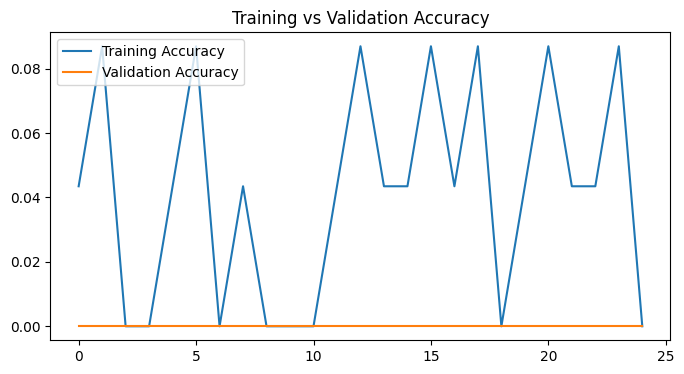

In [14]:
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


# **Make a Prediction Example**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted Class: Q


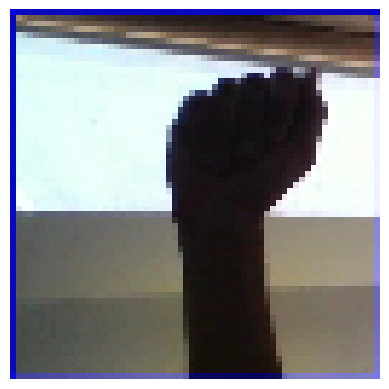

In [15]:
sample_img = load_img("A_test.jpg", target_size=(64,64))
plt.imshow(sample_img)
plt.axis("off")

sample_arr = img_to_array(sample_img) / 255.0
sample_arr = np.expand_dims(sample_arr, axis=0)

pred = np.argmax(model.predict(sample_arr))
print("Predicted Class:", unique_labels[pred])


# **Save the Model**

In [16]:
model.save("hand_gesture_recognition_model.h5")
print("✅ Model Saved Successfully!")


✅ Model Saved Successfully!


# **Business Impact / Conclusion**

**Business Insight:**

This model can interpret hand gestures (A–Z, Space, Nothing), allowing touchless communication — helpful in Sign Language Recognition, Assistive Communication, and Gesture-based Interfaces for IoT and Virtual Reality systems.